In [ ]:
# Set the seed value for the notebook so the results are reproducible
from numpy.random import seed
seed(1)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

import os

import warnings
warnings.simplefilter('ignore', FutureWarning)

# Read the CSV and Perform Basic Data Cleaning

In [36]:
df = pd.read_csv("Resources/MSFT.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-19,51.480000,51.680000,50.060001,50.560001,46.137611,43564500
1,2016-01-20,49.980000,51.380001,49.099998,50.790001,46.347496,63273000
2,2016-01-21,51.000000,51.580002,50.299999,50.480000,46.064606,40191200
3,2016-01-22,51.410000,52.330002,51.259998,52.290001,47.716290,37555800
4,2016-01-25,51.939999,52.650002,51.650002,51.790001,47.260017,34707700


In [37]:
df = df.drop(columns=['Date'])
df.head()

,Open,High,Low,Close,Adj Close,Volume
0,51.480000,51.680000,50.060001,50.560001,46.137611,43564500
1,49.980000,51.380001,49.099998,50.790001,46.347496,63273000
2,51.000000,51.580002,50.299999,50.480000,46.064606,40191200
3,51.410000,52.330002,51.259998,52.290001,47.716290,37555800
4,51.939999,52.650002,51.650002,51.790001,47.260017,34707700


# Select your features (columns)

In [38]:
# Set features. This will also be used as your x values.

diff = df['Close']-df["Open"]
diff_locations = []
for i in diff:
    if (i <0):
        diff_locations.append(0)
    else:
        diff_locations.append(1)
df['diff'] = pd.DataFrame(diff_locations)
df = df[['Open','High', 'Low', 'Close', 'Volume','diff']]
#X = df[['High', 'Low', 'Close', 'Volume']]
df.head()

,Open,High,Low,Close,Volume,diff
0,51.480000,51.680000,50.060001,50.560001,43564500,0
1,49.980000,51.380001,49.099998,50.790001,63273000,1
2,51.000000,51.580002,50.299999,50.480000,40191200,0
3,51.410000,52.330002,51.259998,52.290001,37555800,1
4,51.939999,52.650002,51.650002,51.790001,34707700,0


In [39]:
y = df["diff"]

X = df[['Open','High', 'Low', 'Close', 'Volume']]
#X = df[['High', 'Low', 'Close', 'Volume']]
print(X.shape, y.shape)

(1259, 5) (1259,)


In [40]:
target_names = ["negative", "positive"]

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [42]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)

In [43]:

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

k: 1, Train/Test Score: 1.000/0.537
k: 3, Train/Test Score: 0.770/0.524
k: 5, Train/Test Score: 0.696/0.530
k: 7, Train/Test Score: 0.674/0.552
k: 9, Train/Test Score: 0.660/0.568
k: 11, Train/Test Score: 0.641/0.575
k: 13, Train/Test Score: 0.637/0.562
k: 15, Train/Test Score: 0.627/0.540
k: 17, Train/Test Score: 0.637/0.527
k: 19, Train/Test Score: 0.626/0.565


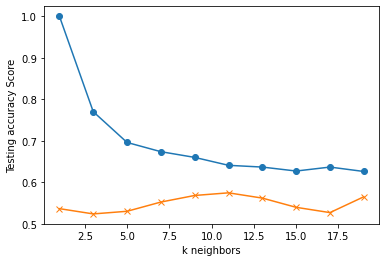

In [44]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [45]:
# Note that k: 13 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train_scaled, y_train)
print('k=13 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=13 Test Acc: 0.562


# Save the Model